# Plotting and GoTerm Analysis Notebook 

In [193]:
import evaluation_metrics as em
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import data_processing as dp
import pandas as pd
from sklearn import metrics
import scipy.stats

%matplotlib inline

In [194]:
local_path = './data/'

# Load human test labels
human_sequences,_ = dp.load_FASTA(local_path+'human_sequences.fasta')
human_train_idx, human_valid_idx, human_test_idx, human_train_labels, \
    human_valid_labels, human_test_labels, human_GO_terms \
    = dp.load_test_sets(local_path+'human_annotations_temporal_holdout.mat')
    
# Load yeast test labels
yeast_sequences, yeast_protein_names = dp.load_FASTA(local_path+'yeast_sequences.fasta')
yeast_train_idx, yeast_valid_idx, yeast_test_idx, yeast_train_labels, yeast_valid_labels, \
    yeast_test_labels, yeast_GO_terms = dp.load_test_sets(local_path+'yeast_MF_temporal_holdout.mat')

#LABELS
def combine_labels(human_labels,yeast_labels):
    humdf = pd.DataFrame(human_labels,columns=human_GO_terms)
    ystdf = pd.DataFrame(yeast_labels,columns=yeast_GO_terms)
    combined = pd.concat([humdf,ystdf],ignore_index=True).fillna(0)
    return combined

combined_test_labels = np.array(combine_labels(human_test_labels,yeast_test_labels))


# Statistics on Go Terms 

In [195]:
yeast_GO_terms

array(['GO:0000975', 'GO:0000981', 'GO:0001067', 'GO:0001071',
       'GO:0003676', 'GO:0003677', 'GO:0003690', 'GO:0003700',
       'GO:0003723', 'GO:0005215', 'GO:0015075', 'GO:0016491',
       'GO:0016740', 'GO:0016787', 'GO:0016788', 'GO:0022857',
       'GO:0022891', 'GO:0022892', 'GO:0030234', 'GO:0043167',
       'GO:0043168', 'GO:0043565', 'GO:0044212', 'GO:0097159',
       'GO:0098772', 'GO:1901363'], dtype=object)

In [305]:
human_GO_terms[:20]

array(['GO:0000166', 'GO:0000975', 'GO:0000976', 'GO:0000977',
       'GO:0000981', 'GO:0000982', 'GO:0000988', 'GO:0000989',
       'GO:0001012', 'GO:0001067', 'GO:0001071', 'GO:0001228',
       'GO:0001664', 'GO:0003677', 'GO:0003682', 'GO:0003690',
       'GO:0003700', 'GO:0003712', 'GO:0003723', 'GO:0003729'], dtype=object)

In [306]:
#Manual -- researched online
binding_ind = [0, 2, 4, 5, 6, 8, 19, 20, 21, 22, 23, 25]
transport_ind = [9, 10, 15, 16, 17 ]
catalytic_ind = [11, 12, 13, 14]
other_ind = [1, 3, 7, 18, 24]
branch_ind = [0, 4, 5, 6, 21, 22]

yeast_GO_terms_binding = yeast_GO_terms[binding_ind]
yeast_GO_terms_transport = yeast_GO_terms[transport_ind]
yeast_GO_terms_catalytic = yeast_GO_terms[catalytic_ind]
yeast_GO_terms_branch = yeast_GO_terms[branch_ind]

In [6]:
print(yeast_train_labels.shape)
print(human_train_labels.shape)

(3447, 26)
(9751, 147)


In [314]:
#Percent of Positive Examples for each GoTerm
P_Per_GoTerm_Yeast = yeast_train_labels.sum(axis=0)/3447
P_Per_GoTerm_Human = human_train_labels.sum(axis=0)/9751

print(P_Per_GoTerm_Yeast)

[ 0.02204816  0.02175805  0.02262837  0.03220191  0.16826226  0.06875544
  0.03771395  0.03220191  0.10037714  0.08442124  0.04873803  0.06527415
  0.19205106  0.20916739  0.07223673  0.0673049   0.06005222  0.07339716
  0.04931825  0.03858428  0.02843052  0.04090513  0.02204816  0.18131709
  0.059472    0.17928634]


In [63]:
#Picking out Go-Terms that appear in at least 5% of human proteins
Common_Human = [i for i in range(len(P_Per_GoTerm_Human)) if P_Per_GoTerm_Human[i] > 0.05]
Common_Human

[10, 13, 16, 30, 35, 37, 79, 96, 103, 106, 116, 119, 121, 122, 128, 143, 144]

In [62]:
#Picking out Go-Terms that appear in at least 5% of yeast proteins
Common_Yeast = [i for i in range(len(P_Per_GoTerm_Yeast)) if P_Per_GoTerm_Yeast[i] > 0.05]
Common_Yeast

[4, 5, 8, 9, 11, 12, 13, 14, 15, 16, 17, 23, 24, 25]

In [11]:
def get_particular_columns(matrix, column_list):
    '''This function returns a matrix, but only the columns indicated in column_list,
    where column_list is a set of index positions'''
    return matrix[:,column_list]

# Download Test Set Results 

In [12]:
path = './capstone_final_models/'
apath = './capstone_final_models/outputs_akash/'

actual_human = human_test_labels.copy()
actual_yeast = yeast_test_labels.copy()
actual_combined = combined_test_labels.copy()

actual_human_LSTM = actual_human[:1600]
actual_yeast_LSTM = actual_yeast[:200]
actual_combined_LSTM = actual_combined[:1850]

actual_human_CNN2 = np.load(apath+'cnn_human/cnn_H_2sequence_labels.npy')
actual_human_GRU1 = np.load(apath+'gru_human/gru_H_1sequence_labels.npy')
actual_human_GRU2 = np.load(apath+'last outputs/gru_H_2sequence_labels.npy')

#Human
FastText_Human_1 = np.load(path+'fasttext_H_1mers.npy')
FastText_Human_2 = np.load(path+'fasttext_H_2mers.npy')

LSTM_Human_1 = np.load(path+'lstm_H1mers.npy')
LSTM_Human_2 = np.load(path+'lstm_H2mers.npy')

GRU_Human_1 = np.load(apath+'gru_H_1mers.npy')
GRU_Human_2 = np.load(apath+'/last outputs/gru_H_2mers.npy')

CNN_Human_1 = np.load(path+'cnn_H_1mers.npy')
CNN_Human_2 = np.load(apath+'cnn_human/cnn_H_2mers.npy')

#Yeast
FastText_Yeast_1 = np.load(path+'fasttext_yeast_1kmers.npy')
FastText_Yeast_2 = np.load(path+'fasttext_yeast_2kmers.npy')

LSTM_Yeast_1 = np.load(path+'lstm_Y1mers.npy')
LSTM_Yeast_2 = np.load(path+'lstm_Y2mers.npy')

GRU_Yeast_1 = np.load(path+'gru_yeast_1kmers.npy')
GRU_Yeast_3 = np.load(path+'gru_yeast_3kmers.npy')

CNN_Yeast_1 = np.load(path+'cnn_yeast_1kmers.npy')
CNN_Yeast_2 = np.load(path+'cnn_yeast_2kmers.npy')

#Combined
FastText_Combined_1 = np.load(path+'fasttext_combined_1kmers.npy')
FastText_Combined_2 = np.load(path+'fasttext_combined_2kmers.npy')

LSTM_Combined_1 = np.load(path+'lstmC1mers.npy')
LSTM_Combined_2 = np.load(path+'lstmC2mers.npy')

GRU_Combined_1 = np.load(path+'gru_combined_1kmers.npy')
GRU_Combined_2 = np.load(path+'gru_combined_2kmers.npy')

CNN_Combined_1 = np.load(path+'cnn_combined_1kmers.npy')
CNN_Combined_2 = np.load(path+'cnn_combined_2kmers.npy')

In [309]:
CNN_Yeast_1

array([[ 0.03045573,  0.00880459,  0.00185036, ...,  0.30388498,
         0.001863  ,  0.00095573],
       [ 0.03643812,  0.01230052,  0.00297475, ...,  0.26064265,
         0.00310384,  0.00156777],
       [ 0.04033506,  0.01888016,  0.00413115, ...,  0.21495847,
         0.00502857,  0.00252297],
       ..., 
       [ 0.02782518,  0.01426862,  0.0019986 , ...,  0.30572107,
         0.0030806 ,  0.00093949],
       [ 0.03309201,  0.01720841,  0.00358583, ...,  0.23285912,
         0.00453344,  0.00186757],
       [ 0.03373993,  0.01579657,  0.00344965, ...,  0.23592277,
         0.0040901 ,  0.00183836]], dtype=float32)

### Need to determine which model has the best performance. 

In [29]:
Human_List = [FastText_Human_1, FastText_Human_2, LSTM_Human_1, LSTM_Human_2, GRU_Human_1, GRU_Human_2,
              CNN_Human_1, CNN_Human_2]

Yeast_List = [FastText_Yeast_1, FastText_Yeast_2, LSTM_Yeast_1, LSTM_Yeast_2, GRU_Yeast_1, GRU_Yeast_3,
               CNN_Yeast_1, CNN_Yeast_2] 

Combined_List = [FastText_Combined_1, FastText_Combined_2, LSTM_Combined_1, LSTM_Combined_2,
                 GRU_Combined_1, GRU_Combined_2, CNN_Combined_1, CNN_Combined_2]

In [30]:
Human_List_Str = ['FastText_Human_1', 'FastText_Human_2', 'LSTM_Human_1', 'LSTM_Human_2','GRU_Human_1',
                  'GRU_Human_2','CNN_Human_1', 'CNN_Human_2']

Yeast_List_Str = ['FastText_Yeast_1', 'FastText_Yeast_2', 'LSTM_Yeast_1', 'LSTM_Yeast_2', 'GRU_Yeast_1', 
                  'GRU_Yeast_3', 'CNN_Yeast_1', 'CNN_Yeast_2'] 

Combined_List_Str = ['FastText_Combined_1', 'FastText_Combined_2', 'LSTM_Combined_1',
                     'LSTM_Combined_2', 'GRU_Combined_1', 'GRU_Combined_2',
                    'CNN_Combined_1', 'CNN_Combined_2']

In [31]:
#Original
Human_MacAUCs = []
Human_MacAUPRs = []
Human_MacFscores = []
Human_MicAUCs = []
Human_MicAUPRs = []
Human_MicFscores = []

#Human
for i in range(len(Human_List)):
    output = Human_List[i]
    if 'LSTM' in Human_List_Str[i]:
        actual = actual_human_LSTM
    elif 'GRU_Human_1' in Human_List_Str[i]:
        actual = actual_human_GRU1
    elif 'CNN_Human_2' in Human_List_Str[i]:
        actual = actual_human_CNN2   
    elif 'GRU_Human_2' in Human_List_Str[i]:
        actual = actual_human_GRU2   
    else:
        actual = actual_human

    MacroAUC = em.calculate_macro_AUC(output, actual)
    MacroAUPR = em.calculate_macro_AUPR(output, actual)
    MacroF = em.calculate_macro_F(output, actual)
    MicroAUC = em.calculate_AUC(output, actual)[0]
    MicroAUPR = em.calculate_AUPR(output, actual)
    MicroF = em.calculate_micro_F1(output, actual)
    
    Human_MacAUCs.append(MacroAUC)
    Human_MacAUPRs.append(MacroAUPR)
    Human_MacFscores.append(MacroF)
    Human_MicAUCs.append(MicroAUC)
    Human_MicAUPRs.append(MicroAUPR)
    Human_MicFscores.append(MicroF)

#Yeast------------------
Yeast_MacAUCs = []
Yeast_MacAUPRs = []
Yeast_MacFscores= []
Yeast_MicAUCs = []
Yeast_MicAUPRs = []
Yeast_MicFscores= []

for i in range(len(Yeast_List)):
    output = Yeast_List[i]
    if 'LSTM' in Yeast_List_Str[i]:
        actual = actual_yeast_LSTM
    else:
        actual = actual_yeast

    MacroAUC = em.calculate_macro_AUC(output, actual)
    MacroAUPR = em.calculate_macro_AUPR(output, actual)
    MacroF = em.calculate_macro_F(output, actual)
    MicroAUC = em.calculate_AUC(output, actual)[0]
    MicroAUPR = em.calculate_AUPR(output, actual)
    MicroF = em.calculate_micro_F1(output, actual)

    Yeast_MacAUCs.append(MacroAUC)
    Yeast_MacAUPRs.append(MacroAUPR)
    Yeast_MacFscores.append(MacroF)
    Yeast_MicAUCs.append(MicroAUC)
    Yeast_MicAUPRs.append(MicroAUPR)
    Yeast_MicFscores.append(MicroF)

#Combined-----------------
Combined_MacAUCs = []
Combined_MacAUPRs = []
Combined_MacFscores= []
Combined_MicAUCs = []
Combined_MicAUPRs = []
Combined_MicFscores= []

for i in range(len(Combined_List)):
    output = Combined_List[i]
    if 'LSTM' in Combined_List_Str[i]:
        actual = actual_combined_LSTM
    else:
        actual = actual_combined

    MacroAUC = em.calculate_macro_AUC(output, actual)
    MacroAUPR = em.calculate_macro_AUPR(output, actual)
    MacroF = em.calculate_macro_F(output, actual)
    MicroAUC = em.calculate_AUC(output, actual)[0]
    MicroAUPR = em.calculate_AUPR(output, actual)
    MicroF = em.calculate_micro_F1(output, actual)

    Combined_MacAUCs.append(MacroAUC)
    Combined_MacAUPRs.append(MacroAUPR)
    Combined_MacFscores.append(MacroF)
    Combined_MicAUCs.append(MicroAUC)
    Combined_MicAUPRs.append(MicroAUPR)
    Combined_MicFscores.append(MicroF)

/Users/Brenton/Documents/Capstone/Beyond-Google/evaluation_metrics.py:96: RuntimeWarning: invalid value encountered in true_divide
  FScores = 2*precision*recall/(precision+recall)
/Users/Brenton/Documents/Capstone/Beyond-Google/evaluation_metrics.py:29: RuntimeWarning: invalid value encountered in true_divide
  FScores = 2*precision*recall/(precision+recall)


In [32]:
#Select GoTerms with high coverage
Human_MacAUCs_high = []
Human_MacAUPRs_high = []
Human_MacFscores_high = []
Human_MicAUCs_high = []
Human_MicAUPRs_high = []
Human_MicFscores_high = []

#Human
for i in range(len(Human_List)):
    output = get_particular_columns(Human_List[i], Common_Human)
    if 'LSTM' in Human_List_Str[i]:
        actual = get_particular_columns(actual_human_LSTM, Common_Human)
    elif 'GRU_Human_1' in Human_List_Str[i]:
        actual = get_particular_columns(actual_human_GRU1, Common_Human)
    elif 'CNN_Human_2' in Human_List_Str[i]:
        actual = get_particular_columns(actual_human_CNN2, Common_Human)   
    elif 'GRU_Human_2' in Human_List_Str[i]:
        actual = get_particular_columns(actual_human_GRU2, Common_Human)   
    else:
        actual = get_particular_columns(actual_human, Common_Human)

    MacroAUC = em.calculate_macro_AUC(output, actual)
    MacroAUPR = em.calculate_macro_AUPR(output, actual)
    MacroF = em.calculate_macro_F(output, actual)
    MicroAUC = em.calculate_AUC(output, actual)[0]
    MicroAUPR = em.calculate_AUPR(output, actual)
    MicroF = em.calculate_micro_F1(output, actual)
    
    Human_MacAUCs_high.append(MacroAUC)
    Human_MacAUPRs_high.append(MacroAUPR)
    Human_MacFscores_high.append(MacroF)
    Human_MicAUCs_high.append(MicroAUC)
    Human_MicAUPRs_high.append(MicroAUPR)
    Human_MicFscores_high.append(MicroF)

#Yeast------------------
Yeast_MacAUCs_high = []
Yeast_MacAUPRs_high = []
Yeast_MacFscores_high = []
Yeast_MicAUCs_high = []
Yeast_MicAUPRs_high = []
Yeast_MicFscores_high = []

for i in range(len(Yeast_List)):
    output = get_particular_columns(Yeast_List[i], Common_Yeast)
    if 'LSTM' in Yeast_List_Str[i]:
        actual = get_particular_columns(actual_yeast_LSTM, Common_Yeast)
    else:
        actual = get_particular_columns(actual_yeast, Common_Yeast)

    MacroAUC = em.calculate_macro_AUC(output, actual)
    MacroAUPR = em.calculate_macro_AUPR(output, actual)
    MacroF = em.calculate_macro_F(output, actual)
    MicroAUC = em.calculate_AUC(output, actual)[0]
    MicroAUPR = em.calculate_AUPR(output, actual)
    MicroF = em.calculate_micro_F1(output, actual)

    Yeast_MacAUCs_high.append(MacroAUC)
    Yeast_MacAUPRs_high.append(MacroAUPR)
    Yeast_MacFscores_high.append(MacroF)
    Yeast_MicAUCs_high.append(MicroAUC)
    Yeast_MicAUPRs_high.append(MicroAUPR)
    Yeast_MicFscores_high.append(MicroF)

/Users/Brenton/Documents/Capstone/Beyond-Google/evaluation_metrics.py:96: RuntimeWarning: invalid value encountered in true_divide
  FScores = 2*precision*recall/(precision+recall)
/Users/Brenton/Documents/Capstone/Beyond-Google/evaluation_metrics.py:29: RuntimeWarning: invalid value encountered in true_divide
  FScores = 2*precision*recall/(precision+recall)


In [67]:
#Select GoTerms for binding branch only 

#Yeast------------------
Yeast_MacAUCs_binding = []
Yeast_MacAUPRs_binding = []
Yeast_MacFscores_binding = []
Yeast_MicAUCs_binding = []
Yeast_MicAUPRs_binding = []
Yeast_MicFscores_binding = []

for i in range(len(Yeast_List)):
    output = get_particular_columns(Yeast_List[i], binding_ind)
    if 'LSTM' in Yeast_List_Str[i]:
        actual = get_particular_columns(actual_yeast_LSTM, binding_ind)
    else:
        actual = get_particular_columns(actual_yeast, binding_ind)

    MacroAUC = em.calculate_macro_AUC(output, actual)
    MacroAUPR = em.calculate_macro_AUPR(output, actual)
    MacroF = em.calculate_macro_F(output, actual)
    MicroAUC = em.calculate_AUC(output, actual)[0]
    MicroAUPR = em.calculate_AUPR(output, actual)
    MicroF = em.calculate_micro_F1(output, actual)

    Yeast_MacAUCs_binding.append(MacroAUC)
    Yeast_MacAUPRs_binding.append(MacroAUPR)
    Yeast_MacFscores_binding.append(MacroF)
    Yeast_MicAUCs_binding.append(MicroAUC)
    Yeast_MicAUPRs_binding.append(MicroAUPR)
    Yeast_MicFscores_binding.append(MicroF)

/Users/Brenton/Documents/Capstone/Beyond-Google/evaluation_metrics.py:96: RuntimeWarning: invalid value encountered in true_divide
  FScores = 2*precision*recall/(precision+recall)
/Users/Brenton/Documents/Capstone/Beyond-Google/evaluation_metrics.py:29: RuntimeWarning: invalid value encountered in true_divide
  FScores = 2*precision*recall/(precision+recall)


In [198]:
#Select GoTerms for transport branch only 
Yeast_MacAUCs_transport = []
Yeast_MacAUPRs_transport = []
Yeast_MacFscores_transport = []
Yeast_MicAUCs_transport = []
Yeast_MicAUPRs_transport = []
Yeast_MicFscores_transport = []

for i in range(len(Yeast_List)):
    output = get_particular_columns(Yeast_List[i], transport_ind)
    if 'LSTM' in Yeast_List_Str[i]:
        actual = get_particular_columns(actual_yeast_LSTM, transport_ind)
    else:
        actual = get_particular_columns(actual_yeast, transport_ind)

    MacroAUC = em.calculate_macro_AUC(output, actual)
    MacroAUPR = em.calculate_macro_AUPR(output, actual)
    MacroF = em.calculate_macro_F(output, actual)
    MicroAUC = em.calculate_AUC(output, actual)[0]
    MicroAUPR = em.calculate_AUPR(output, actual)
    MicroF = em.calculate_micro_F1(output, actual)

    Yeast_MacAUCs_transport.append(MacroAUC)
    Yeast_MacAUPRs_transport.append(MacroAUPR)
    Yeast_MacFscores_transport.append(MacroF)
    Yeast_MicAUCs_transport.append(MicroAUC)
    Yeast_MicAUPRs_transport.append(MicroAUPR)
    Yeast_MicFscores_transport.append(MicroF)
    
    
#Select GoTerms for catalytic branch only 

Yeast_MacAUCs_catalytic = []
Yeast_MacAUPRs_catalytic = []
Yeast_MacFscores_catalytic = []
Yeast_MicAUCs_catalytic = []
Yeast_MicAUPRs_catalytic = []
Yeast_MicFscores_catalytic = []

for i in range(len(Yeast_List)):
    output = get_particular_columns(Yeast_List[i], catalytic_ind)
    if 'LSTM' in Yeast_List_Str[i]:
        actual = get_particular_columns(actual_yeast_LSTM, catalytic_ind)
    else:
        actual = get_particular_columns(actual_yeast, catalytic_ind)

    MacroAUC = em.calculate_macro_AUC(output, actual)
    MacroAUPR = em.calculate_macro_AUPR(output, actual)
    MacroF = em.calculate_macro_F(output, actual)
    MicroAUC = em.calculate_AUC(output, actual)[0]
    MicroAUPR = em.calculate_AUPR(output, actual)
    MicroF = em.calculate_micro_F1(output, actual)

    Yeast_MacAUCs_catalytic.append(MacroAUC)
    Yeast_MacAUPRs_catalytic.append(MacroAUPR)
    Yeast_MacFscores_catalytic.append(MacroF)
    Yeast_MicAUCs_catalytic.append(MicroAUC)
    Yeast_MicAUPRs_catalytic.append(MicroAUPR)
    Yeast_MicFscores_catalytic.append(MicroF)
    
    
#Select columns for binding subbranch only
Yeast_MacAUCs_branch = []
Yeast_MacAUPRs_branch = []
Yeast_MacFscores_branch = []
Yeast_MicAUCs_branch = []
Yeast_MicAUPRs_branch = []
Yeast_MicFscores_branch = []

for i in range(len(Yeast_List)):
    output = get_particular_columns(Yeast_List[i], branch_ind)
    if 'LSTM' in Yeast_List_Str[i]:
        actual = get_particular_columns(actual_yeast_LSTM, branch_ind)
    else:
        actual = get_particular_columns(actual_yeast, branch_ind)

    MacroAUC = em.calculate_macro_AUC(output, actual)
    MacroAUPR = em.calculate_macro_AUPR(output, actual)
    MacroF = em.calculate_macro_F(output, actual)
    MicroAUC = em.calculate_AUC(output, actual)[0]
    MicroAUPR = em.calculate_AUPR(output, actual)
    MicroF = em.calculate_micro_F1(output, actual)

    Yeast_MacAUCs_branch.append(MacroAUC)
    Yeast_MacAUPRs_branch.append(MacroAUPR)
    Yeast_MacFscores_branch.append(MacroF)
    Yeast_MicAUCs_branch.append(MicroAUC)
    Yeast_MicAUPRs_branch.append(MicroAUPR)
    Yeast_MicFscores_branch.append(MicroF)
    

/Users/Brenton/Documents/Capstone/Beyond-Google/evaluation_metrics.py:96: RuntimeWarning: invalid value encountered in true_divide
  FScores = 2*precision*recall/(precision+recall)
/Users/Brenton/Documents/Capstone/Beyond-Google/evaluation_metrics.py:29: RuntimeWarning: invalid value encountered in true_divide
  FScores = 2*precision*recall/(precision+recall)


In [81]:
Human_DF = pd.DataFrame(np.column_stack([Human_MacAUCs, Human_MacAUPRs, Human_MacFscores,
                                         Human_MicAUCs, Human_MicAUPRs, Human_MicFscores]), 
                               columns=['MacAUC', 'MacAUPR', 'MacF', 'MicAUC','MicAUPR', 'MicF'], 
                                index=Human_List_Str)

Yeast_DF = pd.DataFrame(np.column_stack([Yeast_MacAUCs, Yeast_MacAUPRs, Yeast_MacFscores,
                                        Yeast_MicAUCs, Yeast_MicAUPRs, Yeast_MicFscores]), 
                               columns=['MacAUC', 'MacAUPR', 'MacF','MicAUC', 'MicAUPR','MicF'], 
                        index=Yeast_List_Str)

Combined_DF = pd.DataFrame(np.column_stack([Combined_MacAUCs, Combined_MacAUPRs, Combined_MacFscores,
                                        Combined_MicAUCs, Combined_MicAUPRs, Combined_MicFscores]), 
                               columns=['MacAUC', 'MacAUPR', 'MacF','MicAUC', 'MicAUPR','MicF'], 
                        index=Combined_List_Str)


Human_DF_high = pd.DataFrame(np.column_stack([Human_MacAUCs_high, Human_MacAUPRs_high, 
                                              Human_MacFscores_high, Human_MicAUCs_high, 
                                              Human_MicAUPRs_high, Human_MicFscores_high]), 
                               columns=['MacAUC', 'MacAUPR', 'MacF', 'MicAUC','MicAUPR', 'MicF'], 
                                index=Human_List_Str)

Yeast_DF_high = pd.DataFrame(np.column_stack([Yeast_MacAUCs_high, Yeast_MacAUPRs_high, 
                                              Yeast_MacFscores_high, Yeast_MicAUCs_high, 
                                              Yeast_MicAUPRs_high, Yeast_MicFscores_high]), 
                               columns=['MacAUC', 'MacAUPR', 'MacF','MicAUC', 'MicAUPR','MicF'], 
                        index=Yeast_List_Str)


Yeast_DF_binding = pd.DataFrame(np.column_stack([Yeast_MacAUCs_binding, Yeast_MacAUPRs_binding, 
                                              Yeast_MacFscores_binding, Yeast_MicAUCs_binding, 
                                              Yeast_MicAUPRs_binding, Yeast_MicFscores_binding]), 
                               columns=['MacAUC', 'MacAUPR', 'MacF','MicAUC', 'MicAUPR','MicF'], 
                        index=Yeast_List_Str)
Yeast_DF_transport = pd.DataFrame(np.column_stack([Yeast_MacAUCs_transport, Yeast_MacAUPRs_transport, 
                                              Yeast_MacFscores_transport, Yeast_MicAUCs_transport, 
                                              Yeast_MicAUPRs_transport, Yeast_MicFscores_transport]), 
                               columns=['MacAUC', 'MacAUPR', 'MacF','MicAUC', 'MicAUPR','MicF'], 
                        index=Yeast_List_Str)
Yeast_DF_catalytic = pd.DataFrame(np.column_stack([Yeast_MacAUCs_catalytic, Yeast_MacAUPRs_catalytic, 
                                              Yeast_MacFscores_catalytic, Yeast_MicAUCs_catalytic, 
                                              Yeast_MicAUPRs_catalytic, Yeast_MicFscores_catalytic]), 
                               columns=['MacAUC', 'MacAUPR', 'MacF','MicAUC', 'MicAUPR','MicF'], 
                        index=Yeast_List_Str)

In [82]:
Yeast_DF_binding = Yeast_DF_binding.drop(['FastText_Yeast_2', 'LSTM_Yeast_2',
                                             'GRU_Yeast_3', 'CNN_Yeast_2'], 0)

Yeast_DF_transport = Yeast_DF_transport.drop(['FastText_Yeast_2', 'LSTM_Yeast_2',
                                             'GRU_Yeast_3', 'CNN_Yeast_2'], 0)

Yeast_DF_catalytic = Yeast_DF_catalytic.drop(['FastText_Yeast_2', 'LSTM_Yeast_2',
                                             'GRU_Yeast_3', 'CNN_Yeast_2'], 0)

### Summary results for yeast 

In [36]:
Yeast_DF

,MacAUC,MacAUPR,MacF,MicAUC,MicAUPR,MicF
FastText_Yeast_1,0.456330,0.107831,0.203379,0.523008,0.099461,0.176249
FastText_Yeast_2,0.475266,0.120501,0.210437,0.535147,0.097138,0.178375
LSTM_Yeast_1,0.501275,0.097021,0.167612,0.596098,0.131348,0.219959
LSTM_Yeast_2,0.500869,0.096173,0.166881,0.606223,0.126528,0.219959
GRU_Yeast_1,0.497609,0.095483,0.171211,0.581721,0.117277,0.199594
GRU_Yeast_3,0.512213,0.098541,0.172509,0.593336,0.135838,0.221929
CNN_Yeast_1,0.470374,0.100990,0.188231,0.544879,0.121859,0.185705
CNN_Yeast_2,0.474629,0.105751,0.191645,0.523857,0.106841,0.167637


In [252]:
#Save summary DFs to file
Human_DF.to_csv('Human Results.csv')
Yeast_DF.to_csv('Yeast Results.csv')

In [38]:
def plot_summary_bars_small(df, models, organism, metrics = ['MacroAUC', 'MacroF'], high = False):

    '''
    Function produces a bar plot that summarizes the MacroF, MacroAUC test set scores
    from certain models.
    
    @metrics: list of strings e.g. ['MacroAUC', 'MacroF']
    Each metric corresponds to one "cluster" of bars
    
    @models: list of strings e.g. ['LSTM', 'GRU', 'CNN'] 
    Each model corresponds to one bar in every cluster.
    '''
    MacroAUCs = list(df['MacAUC'])
    MacroFs = list(df['MacF'])
    
    MicroAUCs = list(df['MicAUC'])
    MicroFs = list(df['MicF'])

    MacroAUCs.append(0)
    MacroFs.append(0)
    MicroAUCs.append(0)
    
    ScoreSequence = MacroAUCs+MicroAUCs+MacroFs+MicroFs
    
    plt.figure(figsize=[10, 8])
    
    ColorDict = {0: 'blue', 1: 'lightskyblue', 2: 'green', 3: 'lightgreen',
                 4: 'firebrick', 5:'indianred', 6: 'purple', 7: 'violet'}

    clusters = len(metrics) #number of evaluation metrics we're looking at
    bars_per_cluster = len(models) #models we're considering for a particular cluster
    spaces = clusters-1 #need blank space between each metric/cluster of bars
    positions = np.arange(clusters*bars_per_cluster+(spaces))
        
    label_start_pos = (bars_per_cluster-1)/2
    gap = bars_per_cluster+1
    label_positions = np.arange(label_start_pos, clusters*gap+bars_per_cluster, gap)
    plt.xticks(label_positions, metrics, size = 14 )
    plt.yticks(size = 14)
    plt.ylim(0, 0.75)
    
    if high == False:
        plt.title('Test Set Results on '+organism+' Proteins', size=16)
    elif high == True:
        plt.title('Test Set Results on '+organism+' Proteins: Frequent GoTerms', size=16)


    barlist = plt.bar(positions, ScoreSequence, align='center', alpha=0.6, width=1, edgecolor='black',
                     zorder=1)    
    
    for i in range(len(positions)):
        spot = i % (bars_per_cluster+1)
        if spot != bars_per_cluster:
            barlist[i].set_color(ColorDict[spot])

    patches = []
    for M in range(len(models)):
        patches.append(mpatches.Patch(color=ColorDict[M], label=models[M]))
    plt.legend(handles=patches, fontsize = 14)
    plt.grid(linestyle=':', axis='y', zorder=0)

In [91]:
def plot_summary_bars_nokmers(df, models, organism, typ, metrics = ['MacroAUC', 'MacroF']):

    '''
    Function produces a bar plot that summarizes the MacroF, MacroAUC, and MacroAUPR test set scores
    from certain models.
    
    @metrics: list of strings e.g. ['MacroAUC', 'MacroAUPR', 'MacroF']
    Each metric corresponds to one "cluster" of bars
    @models: list of strings e.g. ['LSTM', 'GRU', 'CNN'] 
    Each model corresponds to one bar in every cluster.
    '''
    MacroAUCs = list(df['MacAUC'])
    MacroFs = list(df['MacF'])
    MicroAUCs = list(df['MicAUC'])
    MicroFs = list(df['MicF'])
    MacroAUCs.append(0)
    MacroFs.append(0)
    MicroAUCs.append(0)
    
    ScoreSequence = MacroAUCs+MicroAUCs+MacroFs+MicroFs
    
    plt.figure(figsize=[10, 8])
    
    ColorDict = {0: 'blue', 1: 'green', 2: 'firebrick', 3: 'purple'}

    clusters = len(metrics) #number of evaluation metrics we're looking at
    bars_per_cluster = len(models) #models we're considering for a particular cluster
    spaces = clusters-1 #need blank space between each metric/cluster of bars
    positions = np.arange(clusters*bars_per_cluster+(spaces))
        
    label_start_pos = (bars_per_cluster-1)/2
    gap = bars_per_cluster+1
    label_positions = np.arange(label_start_pos, clusters*gap+bars_per_cluster, gap)
    plt.xticks(label_positions, metrics, size = 14 )
    plt.yticks(size = 14)
    plt.ylim(0, 0.75)
    
    
    plt.title('Test Set Results on '+organism+' Proteins: '+typ+' Go Terms', size=16)
    barlist = plt.bar(positions, ScoreSequence, align='center', alpha=0.6, width=1, edgecolor='black',
                     zorder=1)    
    for i in range(len(positions)):
        spot = i % (bars_per_cluster+1)
        if spot != bars_per_cluster:
            barlist[i].set_color(ColorDict[spot])

    patches = []
    for M in range(len(models)):
        patches.append(mpatches.Patch(color=ColorDict[M], label=models[M]))
    plt.legend(handles=patches, fontsize = 14)
    plt.grid(linestyle=':', axis='y', zorder=0)

In [266]:
def basics(df, metrics=['MacAUC', 'MicAUC', 'MacF', 'MicF'], 
           models = ['FastText', 'LSTM', 'GRU', 'CNN']):
    MacroAUCs = list(df['MacAUC'])
    MacroFs = list(df['MacF'])
    MicroAUCs = list(df['MicAUC'])
    MicroFs = list(df['MicF'])
    MacroAUCs.append(0)
    MacroFs.append(0)
    MicroAUCs.append(0)
    
    ScoreSequence = MacroAUCs+MicroAUCs+MacroFs+MicroFs
        
    ColorDict = {0: 'blue', 1: 'green', 2: 'firebrick', 3: 'purple'}

    clusters = len(metrics) #number of evaluation metrics we're looking at
    bars_per_cluster = len(models) #models we're considering for a particular cluster
    spaces = clusters-1 #need blank space between each metric/cluster of bars
    positions = np.arange(clusters*bars_per_cluster+(spaces))
        
    label_start_pos = (bars_per_cluster-1)/2
    gap = bars_per_cluster+1
    label_positions = np.arange(label_start_pos, clusters*gap+bars_per_cluster, gap)
    plt.xticks(label_positions, metrics, size = 14 )
    plt.yticks(size = 14)
    plt.ylim(0, 0.75)
    
    barlist = plt.bar(positions, ScoreSequence, align='center', alpha=0.6, width=1, edgecolor='black',
                     zorder=1)    
    for i in range(len(positions)):
        spot = i % (bars_per_cluster+1)
        if spot != bars_per_cluster:
            barlist[i].set_color(ColorDict[spot])

    patches = []
    for M in range(len(models)):
        patches.append(mpatches.Patch(color=ColorDict[M], label=models[M]))
    plt.legend(handles=patches, fontsize = 14)
    plt.grid(linestyle=':', axis='y', zorder=0)

# Summary Charts 

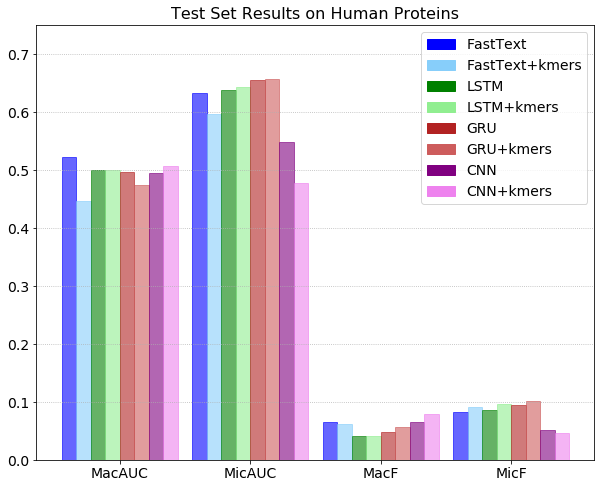

In [39]:
plot_summary_bars_small(Human_DF, models = ['FastText', 'FastText+kmers', 'LSTM', 'LSTM+kmers', 
                                      'GRU', 'GRU+kmers', 'CNN', 'CNN+kmers'], 
                  organism = 'Human', metrics=['MacAUC', 'MicAUC', 'MacF', 'MicF'])

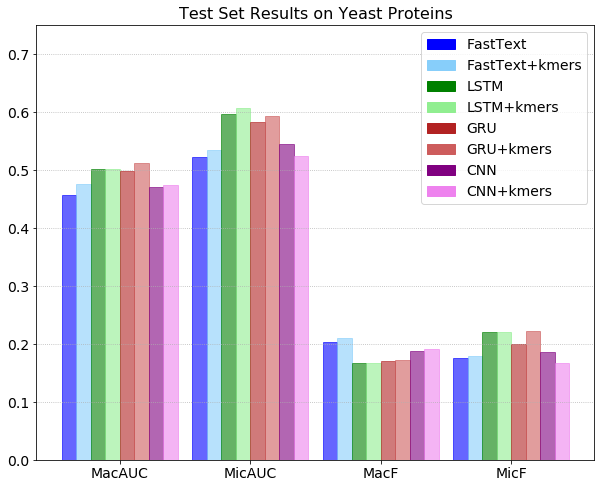

In [41]:
plot_summary_bars_small(Yeast_DF, models = ['FastText', 'FastText+kmers', 'LSTM', 'LSTM+kmers',
                                      'GRU', 'GRU+kmers', 'CNN', 'CNN+kmers'], 
                  metrics=['MacAUC', 'MicAUC', 'MacF', 'MicF'], organism = 'Yeast')

# Micro - AUC ROC curves

In [44]:
import sklearn
def calculate_AUC(predicted, actual):
    #Micro AUC
    #Inputs are 2-D numpy arrays
    try:
        fpr, tpr, thresholds = metrics.roc_curve(actual.ravel(), predicted.ravel(), pos_label=1)
        AUC = metrics.auc(fpr, tpr)
        return AUC, fpr, tpr
    except ValueError:
        return -1,-1,-1

def AUC_parameters(org):
    plt.figure(figsize=[8,8])
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    lw = 2
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', size=14)
    plt.ylabel('True Positive Rate', size=14)
    plt.title('ROC Curves: '+org, size=20)

def plot_multiple_AUC_curves(predicted_list, actuals, label_list, org):
    #predicted_list: a list of 2-D prediction arrays. One from FastText, one from LSTM, etc.
    #actual: 2-D array of outputs that is consistent across all model types
    #Label_list corresponds to a list of model types as strings -- e.g. ['FastText', 'LSTM', 'GRU']
    #org corresponds to an organism type -- e.g. 'Human'
    ColorDict = {0:'blue', 1:'green', 2:'red', 3: 'purple'}
    AUC_parameters(org)
    for i in range(len(predicted_list)):
        predicted = predicted_list[i]
        label = label_list[i]
        if 'LSTM' in label:
            actual = actuals[1]
        else:
            actual = actuals[0]
        
        AUC, fpr, tpr = calculate_AUC(predicted, actual)
        co = ColorDict[i]
        plt.plot(fpr, tpr, lw=2, color=co, label=label+' (MicroAUC = %0.2f)' % AUC)
        plt.legend(loc="lower right")

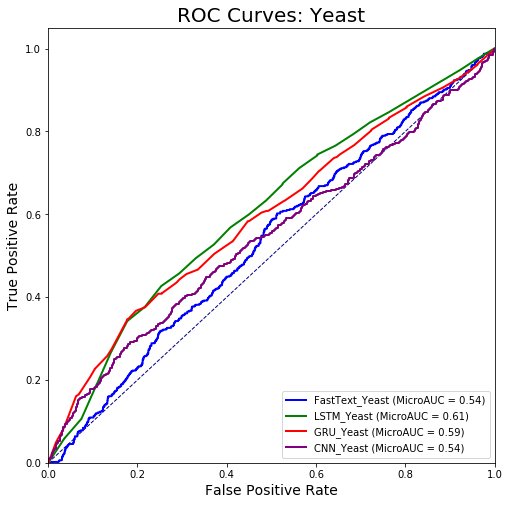

In [45]:
plot_multiple_AUC_curves([FastText_Yeast_2, LSTM_Yeast_2, GRU_Yeast_3, CNN_Yeast_1], 
                         [actual_yeast, actual_yeast_LSTM], 
                            ['FastText_Yeast', 'LSTM_Yeast', 'GRU_Yeast', 'CNN_Yeast'],
                            'Yeast')

In [ ]:
def round_upper(x):
    '''Rounds up to the nearest tenth (0.1)'''
    n = round(x, 1)
    return n if n-.1 < x <= n else n+.1

def round_lower(x):
    '''Rounds down to the nearest tenth (0.1)'''
    n = round(x, 1)
    return n if n+.1 >= x > n else n-.1

def plot_GoTerm_Bars(score_list, label, org, metric = 'AUC'):
    '''
    score_list is a list of AUCs, one AUC for each GoTerm. Length = # of GoTerms
    @label corresponds to a model type -- e.g. 'FastText'
    @org corresponds to an organism type -- e.g. 'Human'
    @metric should be "AUC" or "AUPR"
    '''
    plt.figure(figsize=[10,8])
    positions = np.arange(len(score_list))
    mean_score = np.mean(score_list)
    scores_sorted = np.flipud(np.sort(score_list))
    max_score = round_upper(scores_sorted[0])
    min_score = round_lower(scores_sorted[-1])
    
    colors = np.where(scores_sorted>0.5, 'blue', 'red')

    barlist = plt.bar(positions, scores_sorted-0.5, align='center', alpha=0.6, width=1, edgecolor='blue')

    for i in range(len(positions)):
        if colors[i] == 'red':
            barlist[i].set_color('salmon')

    plt.axhline(y=mean_score-0.5, color='navy', linestyle=':')
    plt.axhline(y=0, color='k', linestyle='-')
    plt.tick_params(axis='x',bottom='off',labelbottom='off')

    plt.annotate('Random Classifier', xy=(8/10*len(score_list), -0.02))
    plt.annotate('Macro '+metric+' ('+str(round(mean_score, 2))+')', xy=(8/10*len(score_list), mean_score-0.49))
    plt.ylabel('Go Term '+metric, size=14)
    plt.title(metric+'s of Go Terms: '+label+' - '+org, size=16)
    #plt.yticks(np.arange(-0.5, 0.6, 0.1), np.arange(0, 1.1, 0.1))
    plt.yticks(np.arange(min_score-0.5, max_score+0.7, 0.1), 
               np.arange(min_score, max_score+0.2, 0.1))
    plt.ylim((min_score-0.55, max_score-0.35))
    
    plt.show()


# Calculate AUCs and F-scores for each GoTerm

In [46]:
#FastText Human---------
AUCsFastH1 = em.find_GoTerm_aucs(FastText_Human_1, actual_human)
AUPRsFastH1 = em.find_GoTerm_auprs(FastText_Human_1, actual_human)
FScoresFastH1 = em.find_GoTerm_FScores(FastText_Human_1, actual_human)

AUCsFastH2 = em.find_GoTerm_aucs(FastText_Human_2, actual_human)
AUPRsFastH2 = em.find_GoTerm_auprs(FastText_Human_2, actual_human)
FScoresFastH2 = em.find_GoTerm_FScores(FastText_Human_2, actual_human)

#FastText Yeast---------
AUCsFastY1 = em.find_GoTerm_aucs(FastText_Yeast_1, actual_yeast)
AUPRsFastY1 = em.find_GoTerm_auprs(FastText_Yeast_1, actual_yeast)
FScoresFastY1 = em.find_GoTerm_FScores(FastText_Yeast_1, actual_yeast)

AUCsFastY2 = em.find_GoTerm_aucs(FastText_Yeast_2, actual_yeast)
AUPRsFastY2 = em.find_GoTerm_auprs(FastText_Yeast_2, actual_yeast)
FScoresFastY2 = em.find_GoTerm_FScores(FastText_Yeast_2, actual_yeast)

#-----

#LSTM Human-----------
AUCsLstmH1 = em.find_GoTerm_aucs(LSTM_Human_1, actual_human_LSTM)
AUPRsLstmH1 = em.find_GoTerm_auprs(LSTM_Human_1, actual_human_LSTM)
FScoresLstmH1 = em.find_GoTerm_FScores(LSTM_Human_1, actual_human_LSTM)

AUCsLstmH2 = em.find_GoTerm_aucs(LSTM_Human_2, actual_human_LSTM)
AUPRsLstmH2 = em.find_GoTerm_auprs(LSTM_Human_2, actual_human_LSTM)
FScoresLstmH2 = em.find_GoTerm_FScores(LSTM_Human_2, actual_human_LSTM)

#LSTM Yeast-----------
AUCsLstmY1 = em.find_GoTerm_aucs(LSTM_Yeast_1, actual_yeast_LSTM)
AUPRsLstmY1 = em.find_GoTerm_auprs(LSTM_Yeast_1, actual_yeast_LSTM)
FScoresLstmY1 = em.find_GoTerm_FScores(LSTM_Yeast_1, actual_yeast_LSTM)

AUCsLstmY2 = em.find_GoTerm_aucs(LSTM_Yeast_2, actual_yeast_LSTM)
AUPRsLstmY2 = em.find_GoTerm_auprs(LSTM_Yeast_2, actual_yeast_LSTM)
FScoresLstmY2 = em.find_GoTerm_FScores(LSTM_Yeast_2, actual_yeast_LSTM)

#-------

#GRU Human------
AUCsGruH1 = em.find_GoTerm_aucs(GRU_Human_1, actual_human_GRU1)
AUPRsGruH1 = em.find_GoTerm_auprs(GRU_Human_1, actual_human_GRU1)
FScoresGruH1 = em.find_GoTerm_FScores(GRU_Human_1, actual_human_GRU1)

AUCsGruH2 = em.find_GoTerm_aucs(GRU_Human_2, actual_human_GRU2)
AUPRsGruH2 = em.find_GoTerm_auprs(GRU_Human_2, actual_human_GRU2)
FScoresGruH2 = em.find_GoTerm_FScores(GRU_Human_2, actual_human_GRU2)

#GRU Yeast------
AUCsGruY1 = em.find_GoTerm_aucs(GRU_Yeast_1, actual_yeast)
AUPRsGruY1 = em.find_GoTerm_auprs(GRU_Yeast_1, actual_yeast)
FScoresGruY1 = em.find_GoTerm_FScores(GRU_Yeast_1, actual_yeast)

AUCsGruY3 = em.find_GoTerm_aucs(GRU_Yeast_3, actual_yeast)
AUPRsGruY3 = em.find_GoTerm_auprs(GRU_Yeast_3, actual_yeast)
FScoresGruY3 = em.find_GoTerm_FScores(GRU_Yeast_3, actual_yeast)

#-----------

#CNN Human------
AUCsCnnH1 = em.find_GoTerm_aucs(CNN_Human_1, actual_human)
AUPRsCnnH1 = em.find_GoTerm_auprs(CNN_Human_1, actual_human)
FScoresCnnH1 = em.find_GoTerm_FScores(CNN_Human_1, actual_human)

AUCsCnnH2 = em.find_GoTerm_aucs(CNN_Human_2, actual_human_CNN2)
AUPRsCnnH2 = em.find_GoTerm_auprs(CNN_Human_2, actual_human_CNN2)
FScoresCnnH2 = em.find_GoTerm_FScores(CNN_Human_2, actual_human_CNN2)

#CNN Yeast------
AUCsCnnY1 = em.find_GoTerm_aucs(CNN_Yeast_1, actual_yeast)
AUPRsCnnY1 = em.find_GoTerm_auprs(CNN_Yeast_1, actual_yeast)
FScoresCnnY1 = em.find_GoTerm_FScores(CNN_Yeast_1, actual_yeast)

AUCsCnnY2 = em.find_GoTerm_aucs(CNN_Yeast_2, actual_yeast)
AUPRsCnnY2 = em.find_GoTerm_auprs(CNN_Yeast_2, actual_yeast)
FScoresCnnY2 = em.find_GoTerm_FScores(CNN_Yeast_2, actual_yeast)

/Users/Brenton/Documents/Capstone/Beyond-Google/evaluation_metrics.py:96: RuntimeWarning: invalid value encountered in true_divide
  FScores = 2*precision*recall/(precision+recall)


# Relationships between GoTerms and AUCs/Fs 

In [230]:
AUChead_H = ['Coverage', 'FastText Human', 'LSTM Human', 
         'GRU Human', 'CNN Human']
AUCtable_H = [P_Per_GoTerm_Human,AUCsFastH1, AUCsLstmH1, 
         AUCsGruH1, AUCsCnnH1]

AUChead_Y = ['Coverage', 'FastText Yeast', 'LSTM Yeast', 
         'GRU Yeast', 'CNN Yeast']
AUCtable_Y = [P_Per_GoTerm_Yeast,AUCsFastY1, AUCsLstmY1, 
         AUCsGruY1, AUCsCnnY1]

Fhead_H = ['Coverage', 'FastText Human', 'LSTM Human', 
         'GRU Human', 'CNN Human']
Ftable_H = [P_Per_GoTerm_Human, FScoresFastH1, FScoresLstmH1, FScoresGruH1, 
            FScoresCnnH1]

Fhead_Y = ['Coverage', 'FastText Yeast', 'LSTM Yeast', 
         'GRU Yeast', 'CNN Yeast']
Ftable_Y = [P_Per_GoTerm_Yeast, FScoresFastY1, FScoresLstmY1, FScoresGruY1, 
            FScoresCnnY1]

In [231]:
AUCHuman = pd.DataFrame(AUCtable_H, index = AUChead_H).T
AUCYeast = pd.DataFrame(AUCtable_Y, index = AUChead_Y).T

FHuman = pd.DataFrame(Ftable_H, index = Fhead_H).T
FYeast = pd.DataFrame(Ftable_Y, index = Fhead_Y).T

#AUCHuman.to_excel('AUCHuman.xlsx')
#AUCYeast.to_csv('AUCYeast.csv')

#FHuman.to_csv('FHuman.csv')
#FYeast.to_csv('FYeast.csv')

In [319]:
#F-Score for each GoTerm
FYeast

,Coverage,FastText Yeast,LSTM Yeast,GRU Yeast,CNN Yeast
0,0.022048,0.111628,0.133333,0.110599,0.112150
1,0.021758,0.101852,0.104265,0.101382,0.102326
2,0.022628,0.113402,0.113208,0.110092,0.114754
3,0.032202,0.132075,0.122066,0.127273,0.129032
4,0.168262,0.320988,0.290598,0.290456,0.295359
5,0.068755,0.407407,0.181818,0.188341,0.198198
6,0.037714,0.181818,0.113208,0.110092,0.150000
7,0.032202,0.128342,0.122066,0.127854,0.131579
8,0.100377,0.253968,0.150235,0.210526,0.269231
9,0.084421,0.210526,0.214286,0.209607,0.215686


In [228]:
binding_ind = [0, 2, 4, 5, 6, 8, 19, 20, 21, 22, 23, 25]
transport_ind = [9, 10, 15, 16, 17 ]
catalytic_ind = [11, 12, 13, 14]
other_ind = [1, 3, 7, 18, 24]
branch_ind = [0, 4, 5, 6, 21, 22]

GoDF = pd.DataFrame(pd.Series(yeast_GO_terms)).rename(columns={0: 'GoTerm'})
Types = ['Binding', 'Other', 'Binding', 'Other', 'Binding', 'Binding', 'Binding',
        'Other', 'Binding', 'Transport', 'Transport', 'Catalytic', 'Catalytic',
        'Catalytic', 'Catalytic', 'Transport', 'Transport', 'Transport', 'Other',
        'Binding', 'Binding', 'Binding', 'Binding', 'Binding', 'Other', 'Binding']
TypesDF = pd.DataFrame(pd.Series(Types)).rename(columns={0: 'Type'})
Branches = [3, 0, 0, 0, 1, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0]
BranchesDF = pd.DataFrame(pd.Series(Branches)).rename(columns={0: 'Branch'})
DF = GoDF.merge(TypesDF.merge(BranchesDF, right_index=True, left_index=True),
               right_index=True, left_index=True)

BranchDF = DF[DF['Branch']!=0].sort_values(by='Branch').reset_index(drop=True)

In [243]:
#AUC/F per GoTerm, but now we know more information about each GoTerm
AUC_Yeast = pd.merge(DF, AUCYeast, left_index=True, right_index=True)
AUC_Human = pd.merge(DF, AUCHuman, left_index=True, right_index=True)
F_Yeast = pd.merge(DF, FYeast, left_index=True, right_index=True)
F_Human = pd.merge(DF, FHuman, left_index=True, right_index=True)

#Focus on single branch of yeast
AUC_Yeast_branch = AUC_Yeast[AUC_Yeast['Branch']!=0].sort_values(by='Branch').reset_index(drop=True)
F_Yeast_branch = F_Yeast[F_Yeast['Branch']!=0].sort_values(by='Branch').reset_index(drop=True)

In [321]:
F_Yeast.head()

,GoTerm,Type,Branch,Coverage,FastText Yeast,LSTM Yeast,GRU Yeast,CNN Yeast
0,GO:0000975,Binding,3,0.022048,0.111628,0.133333,0.110599,0.112150
1,GO:0000981,Other,0,0.021758,0.101852,0.104265,0.101382,0.102326
2,GO:0001067,Binding,0,0.022628,0.113402,0.113208,0.110092,0.114754
3,GO:0001071,Other,0,0.032202,0.132075,0.122066,0.127273,0.129032
4,GO:0003676,Binding,1,0.168262,0.320988,0.290598,0.290456,0.295359


# Comparing correlations btwn Coverage and AUC/F 

In [328]:
#Coefficients between Coverage and AUC values
AUC_Coef_Human = []
for arr in AUCtable_H[1:]:
    auc = np.corrcoef(arr, P_Per_GoTerm_Human)[0][1]
    AUC_Coef_Human.append(auc)
    
AUC_Coef_Yeast = []
for arr in AUCtable_Y[1:]:
    auc = np.corrcoef(arr, P_Per_GoTerm_Yeast)[0][1]
    AUC_Coef_Yeast.append(auc)
    
F_Coef_Human = []
for arr in Ftable_H[1:]:
    F = np.corrcoef(arr, P_Per_GoTerm_Human)[0][1]
    F_Coef_Human.append(F)

F_Coef_Yeast = []
for arr in Ftable_Y[1:]:
    F = np.corrcoef(arr, P_Per_GoTerm_Yeast)[0][1]
    F_Coef_Yeast.append(F)
    
print('AUC to Coverage correlations\n'+str(AUC_Coef_Human), '\n'+str(AUC_Coef_Yeast), 
      '\n\nF-Score to Coverage correlations\n'+str(F_Coef_Human), '\n'+str(F_Coef_Yeast))

AUC to Coverage correlations
[-0.053581305416129189, 0.052586827352742664, -0.11556084598480555, -0.038396530356781422] 
[0.21954891834829923, -0.30573693173214583, 0.26221605975104428, 0.2268511945275864] 

F-Score to Coverage correlations
[0.5109457225339199, 0.67162346471960532, 0.54267908979821555, 0.42149911267889184] 
[0.60843943702114878, 0.85403372410722211, 0.88344641713741245, 0.86827984537494374]


# AUCs per Go Term 

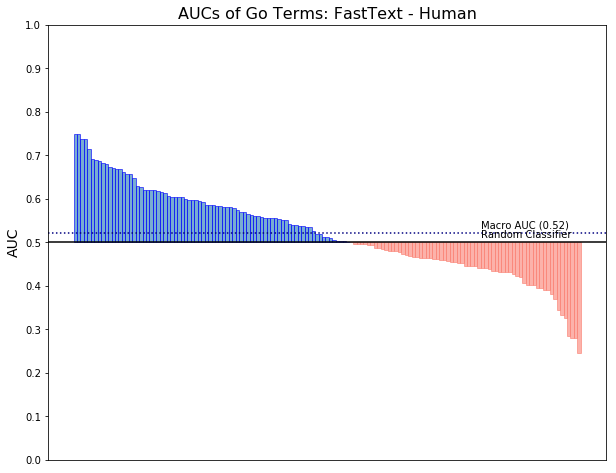

In [316]:
em.plot_GoTerm_Bars(AUCsFastH1, 'FastText', 'Human')

# F-Scores per Go Term 

In [289]:
def plot_GoTerm_Bars_Fscore(score_list, label, org, metric = 'F-Score'):
    '''
    score_list is a list of Fscores, one Fscore for each GoTerm. Length = # of GoTerms
    @label corresponds to a model type -- e.g. 'FastText'
    @org corresponds to an organism type -- e.g. 'Human'
    '''
    plt.figure(figsize=[10,8])
    positions = np.arange(len(score_list))
    mean_score = np.mean(score_list)
    scores_sorted = np.flipud(np.sort(score_list))
    top_score = scores_sorted[0]
  
    barlist = plt.bar(positions, scores_sorted, align='center', alpha=0.6, width=1, edgecolor='blue')
    plt.axhline(y=mean_score, color='navy', linestyle=':')
    plt.tick_params(axis='x',bottom='off',labelbottom='off')
    plt.annotate('Macro '+metric+' ('+str(round(mean_score,2))+')', xy=(8/10*len(score_list), mean_score+0.005))
    plt.ylabel(metric, size=18)
    plt.title(metric+'s of Go Terms: '+label+' - '+org, size=24)
    plt.yticks(np.arange(0, top_score+.1, 0.1), size=14)
    plt.savefig(label+'-'+org+'.pdf')
    plt.show()


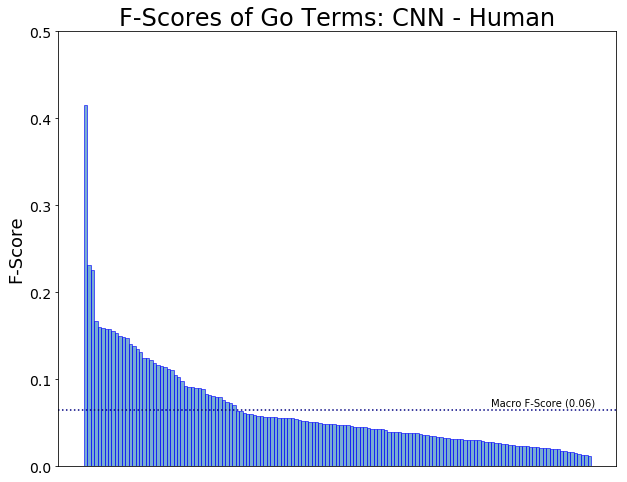

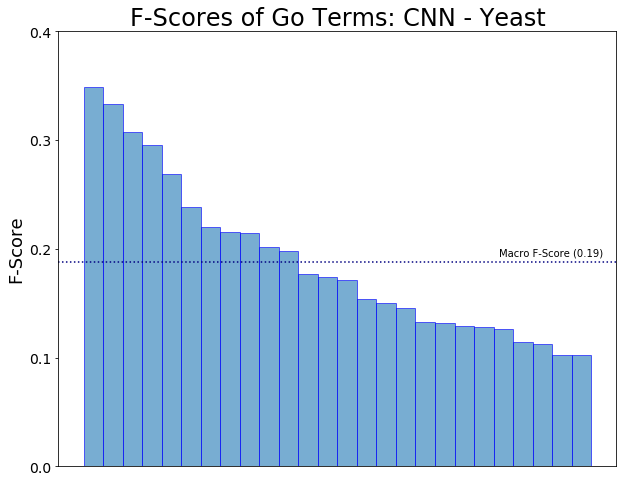

In [290]:
#plot_GoTerm_Bars_Fscore(FScoresFastH1, 'FastText', 'Human')
#plot_GoTerm_Bars_Fscore(FScoresFastY1, 'FastText', 'Yeast')
#plot_GoTerm_Bars_Fscore(FScoresLstmH1, 'LSTM', 'Human')
#plot_GoTerm_Bars_Fscore(FScoresLstmY1, 'LSTM', 'Yeast')
#plot_GoTerm_Bars_Fscore(FScoresGruH1, 'GRU', 'Human')
#plot_GoTerm_Bars_Fscore(FScoresGruY1, 'GRU', 'Yeast')
plot_GoTerm_Bars_Fscore(FScoresCnnH1, 'CNN', 'Human')
plot_GoTerm_Bars_Fscore(FScoresCnnY1, 'CNN', 'Yeast')

# Correlation between "Coverage" and F-Score 

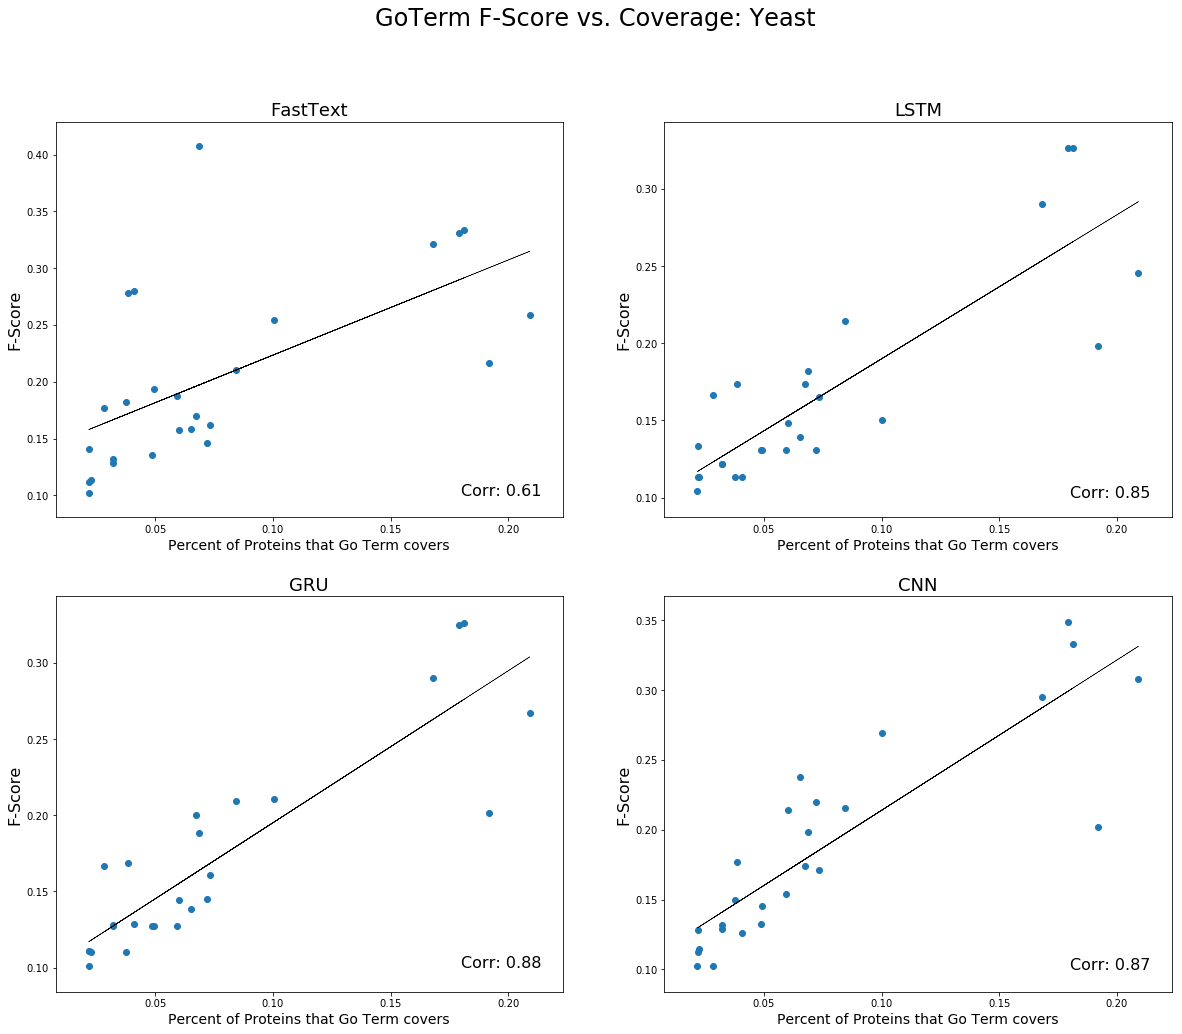

In [190]:
ax = plt.figure(figsize=[20,16])
plt.suptitle('GoTerm F-Score vs. Coverage: Yeast', size=24)


plt.subplot(2,2,1)
plt.title('FastText', size=18)
plt.xlabel('Percent of Proteins that Go Term covers', size=14)
plt.ylabel('F-Score', size=16)
plt.xticks([0.05, 0.1, 0.15, 0.2])
plt.scatter(P_Per_GoTerm_Yeast, FScoresFastY1)
correlation = round(np.corrcoef(P_Per_GoTerm_Yeast, FScoresFastY1)[0][1], 2)
plt.annotate('Corr: '+str(correlation), xy=(0.18,0.10), size=16)
z = np.polyfit(P_Per_GoTerm_Yeast, FScoresFastY1, 1)
p = np.poly1d(z)
plt.plot(P_Per_GoTerm_Yeast,p(P_Per_GoTerm_Yeast), color = 'black', lw =0.5)

plt.subplot(2,2,2)
plt.title('LSTM', size=18)
plt.xlabel('Percent of Proteins that Go Term covers', size=14)
plt.ylabel('F-Score', size=16)
plt.xticks([0.05, 0.1, 0.15, 0.2])
plt.scatter(P_Per_GoTerm_Yeast, FScoresLstmY1)
correlation = round(np.corrcoef(P_Per_GoTerm_Yeast, FScoresLstmY1)[0][1], 2)
plt.annotate('Corr: '+str(correlation), xy=(0.18,0.10), size=16)
z = np.polyfit(P_Per_GoTerm_Yeast, FScoresLstmY1, 1)
p = np.poly1d(z)
plt.plot(P_Per_GoTerm_Yeast,p(P_Per_GoTerm_Yeast), color = 'black', lw =0.5)

plt.subplot(2,2,3)
plt.title('GRU', size=18)
plt.xlabel('Percent of Proteins that Go Term covers', size=14)
plt.ylabel('F-Score', size=16)
plt.xticks([0.05, 0.1, 0.15, 0.2])
plt.scatter(P_Per_GoTerm_Yeast, FScoresGruY1)
correlation = round(np.corrcoef(P_Per_GoTerm_Yeast, FScoresGruY1)[0][1], 2)
plt.annotate('Corr: '+str(correlation), xy=(0.18,0.10), size=16)
z = np.polyfit(P_Per_GoTerm_Yeast, FScoresGruY1, 1)
p = np.poly1d(z)
plt.plot(P_Per_GoTerm_Yeast,p(P_Per_GoTerm_Yeast), color = 'black', lw =0.5)

plt.subplot(2,2,4)
plt.title('CNN', size=18)
plt.xlabel('Percent of Proteins that Go Term covers', size=14)
plt.ylabel('F-Score', size=16)
plt.xticks([0.05, 0.1, 0.15, 0.2])
plt.scatter(P_Per_GoTerm_Yeast, FScoresCnnY1)
correlation = round(np.corrcoef(P_Per_GoTerm_Yeast, FScoresCnnY1)[0][1], 2)
plt.annotate('Corr: '+str(correlation), xy=(0.18,0.10), size=16)
z = np.polyfit(P_Per_GoTerm_Yeast, FScoresCnnY1, 1)
p = np.poly1d(z)
plt.plot(P_Per_GoTerm_Yeast,p(P_Per_GoTerm_Yeast), color = 'black', lw =0.5)

plt.savefig('GoTerm_F_vs_Coverage_Yeast.pdf')

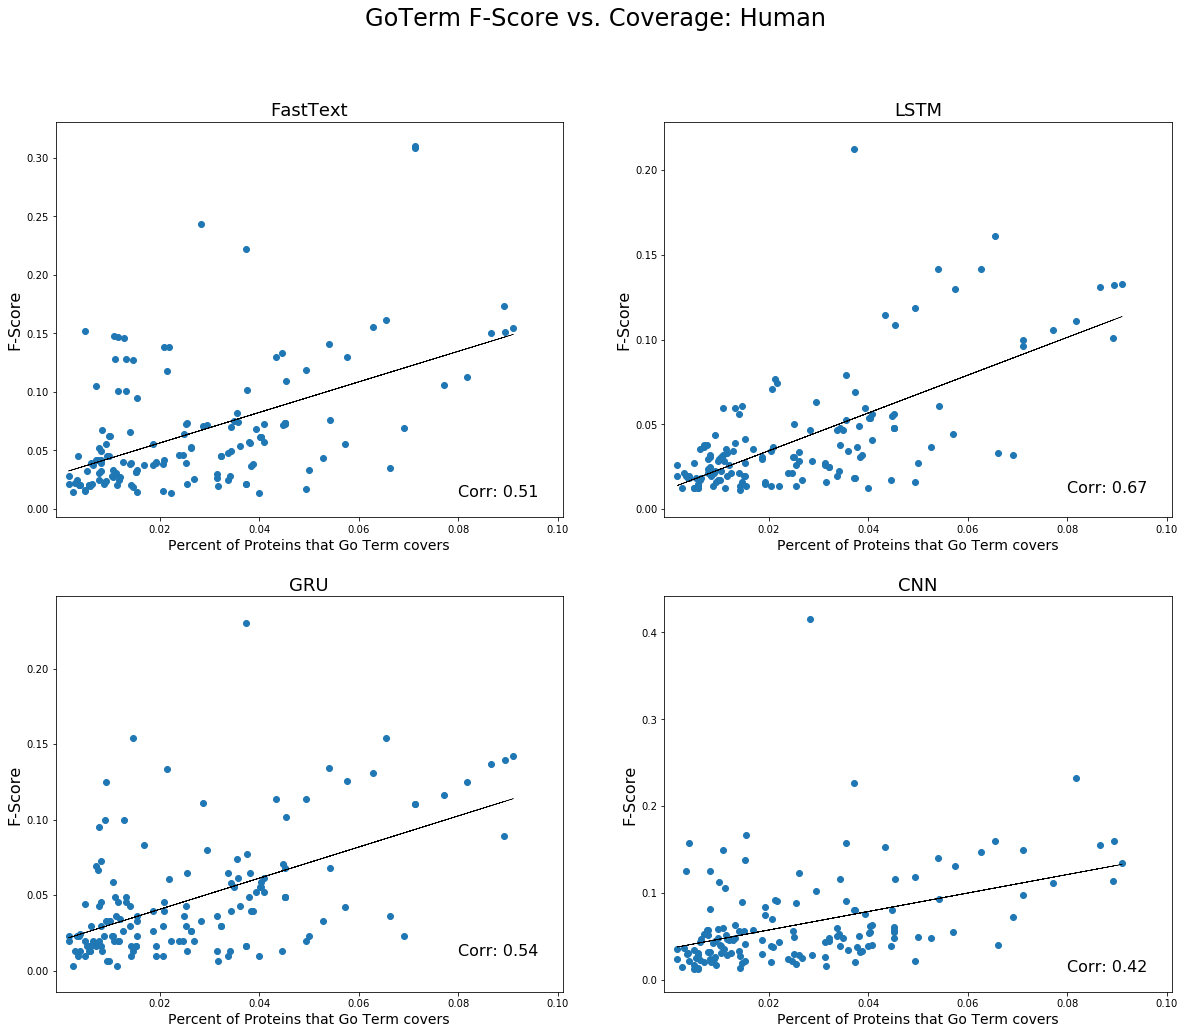

In [191]:
ax = plt.figure(figsize=[20,16])
plt.suptitle('GoTerm F-Score vs. Coverage: Human', size=24)

plt.subplot(2,2,1)
plt.title('FastText', size=18)
plt.xlabel('Percent of Proteins that Go Term covers', size=14)
plt.ylabel('F-Score', size=16)
plt.xlim([-0.001,0.101])
plt.xticks([0.02, 0.04, 0.06, 0.08, 0.1])
plt.scatter(P_Per_GoTerm_Human, FScoresFastH1)
correlation = round(np.corrcoef(P_Per_GoTerm_Human, FScoresFastH1)[0][1], 2)
plt.annotate('Corr: '+str(correlation), xy=(0.08,0.01), size=16)
z = np.polyfit(P_Per_GoTerm_Human, FScoresFastH1, 1)
p = np.poly1d(z)
plt.plot(P_Per_GoTerm_Human, p(P_Per_GoTerm_Human), color = 'black', lw =0.5)

plt.subplot(2,2,2)
plt.title('LSTM', size=18)
plt.xlabel('Percent of Proteins that Go Term covers', size=14)
plt.ylabel('F-Score', size=16)
plt.xlim([-0.001,0.101])
plt.xticks([0.02, 0.04, 0.06, 0.08, 0.1])
plt.scatter(P_Per_GoTerm_Human, FScoresLstmH1)
correlation = round(np.corrcoef(P_Per_GoTerm_Human, FScoresLstmH1)[0][1], 2)
plt.annotate('Corr: '+str(correlation), xy=(0.08,0.01), size=16)
z = np.polyfit(P_Per_GoTerm_Human, FScoresLstmH1, 1)
p = np.poly1d(z)
plt.plot(P_Per_GoTerm_Human, p(P_Per_GoTerm_Human), color = 'black', lw =0.5)

plt.subplot(2,2,3)
plt.title('GRU', size=18)
plt.xlabel('Percent of Proteins that Go Term covers', size=14)
plt.ylabel('F-Score', size=16)
plt.xlim([-0.001,0.101])
plt.xticks([0.02, 0.04, 0.06, 0.08, 0.1])
plt.scatter(P_Per_GoTerm_Human, FScoresGruH1)
correlation = round(np.corrcoef(P_Per_GoTerm_Human, FScoresGruH1)[0][1], 2)
plt.annotate('Corr: '+str(correlation), xy=(0.08,0.01), size=16)
z = np.polyfit(P_Per_GoTerm_Human, FScoresGruH1, 1)
p = np.poly1d(z)
plt.plot(P_Per_GoTerm_Human, p(P_Per_GoTerm_Human), color = 'black', lw =0.5)

plt.subplot(2,2,4)
plt.title('CNN', size=18)
plt.xlabel('Percent of Proteins that Go Term covers', size=14)
plt.ylabel('F-Score', size=16)
plt.xlim([-0.001,0.101])
plt.xticks([0.02, 0.04, 0.06, 0.08, 0.1])
plt.scatter(P_Per_GoTerm_Human, FScoresCnnH1)
correlation = round(np.corrcoef(P_Per_GoTerm_Human, FScoresCnnH1)[0][1], 2)
plt.annotate('Corr: '+str(correlation), xy=(0.08,0.01), size=16)
z = np.polyfit(P_Per_GoTerm_Human, FScoresCnnH1, 1)
p = np.poly1d(z)
plt.plot(P_Per_GoTerm_Human, p(P_Per_GoTerm_Human), color = 'black', lw =0.5)

plt.savefig('GoTerm_F_vs_Coverage_Human.pdf')

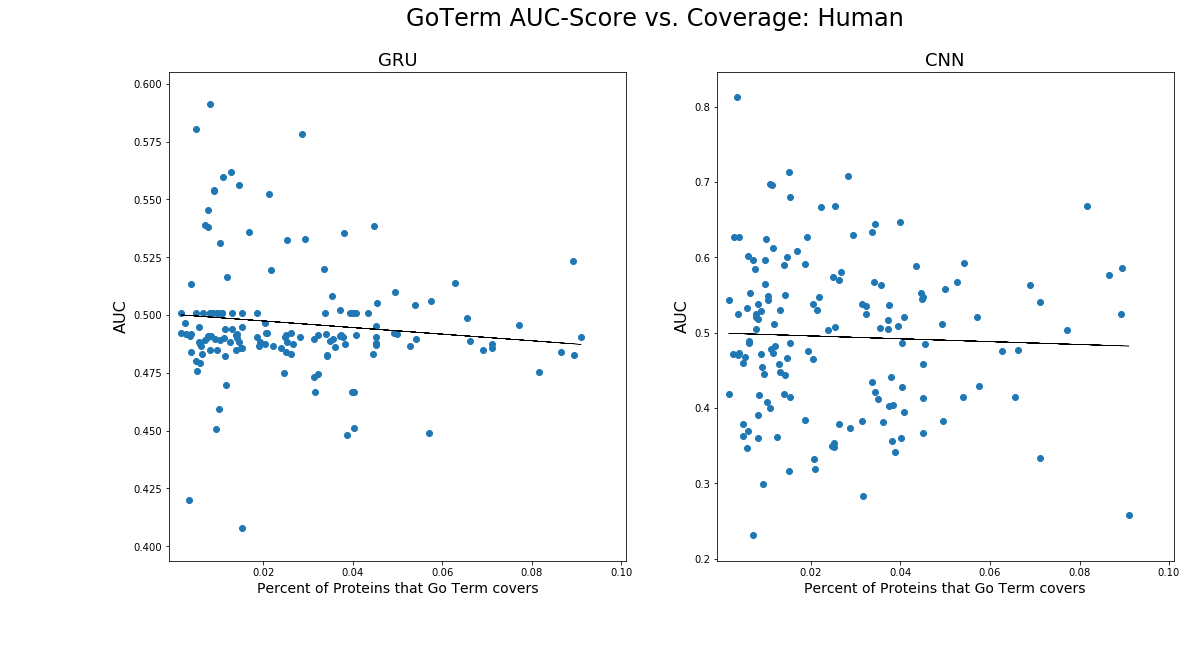

In [343]:
ax = plt.figure(figsize=[18,9])
plt.suptitle('GoTerm AUC-Score vs. Coverage: Human', size=24)

plt.subplot(1,2,1)
plt.title('GRU', size=18)
plt.xlabel('Percent of Proteins that Go Term covers', size=14)
plt.ylabel('AUC', size=16)
plt.xlim([-0.001,0.101])
plt.xticks([0.02, 0.04, 0.06, 0.08, 0.1])
plt.scatter(P_Per_GoTerm_Human, AUCsGruH1)
correlation = round(np.corrcoef(P_Per_GoTerm_Human, AUCsGruH1)[0][1], 2)
plt.annotate('Corr: '+str(correlation), xy=(0.08,0.01), size=16)
z = np.polyfit(P_Per_GoTerm_Human, AUCsGruH1, 1)
p = np.poly1d(z)
plt.plot(P_Per_GoTerm_Human, p(P_Per_GoTerm_Human), color = 'black', lw =0.5)

plt.subplot(1,2,2)
plt.title('CNN', size=18)
plt.xlabel('Percent of Proteins that Go Term covers', size=14)
plt.ylabel('AUC', size=16)
plt.xlim([-0.001,0.101])
plt.xticks([0.02, 0.04, 0.06, 0.08, 0.1])
plt.scatter(P_Per_GoTerm_Human, AUCsCnnH1)
correlation = round(np.corrcoef(P_Per_GoTerm_Human, AUCsCnnH1)[0][1], 2)
plt.annotate('Corr: '+str(correlation), xy=(0.08,0.01), size=16)
z = np.polyfit(P_Per_GoTerm_Human, AUCsCnnH1, 1)
p = np.poly1d(z)
plt.plot(P_Per_GoTerm_Human, p(P_Per_GoTerm_Human), color = 'black', lw =0.5)

plt.savefig('GoTerm_AUC_vs_Coverage_Human.pdf')

# Metrics by Subgroup in Yeast 

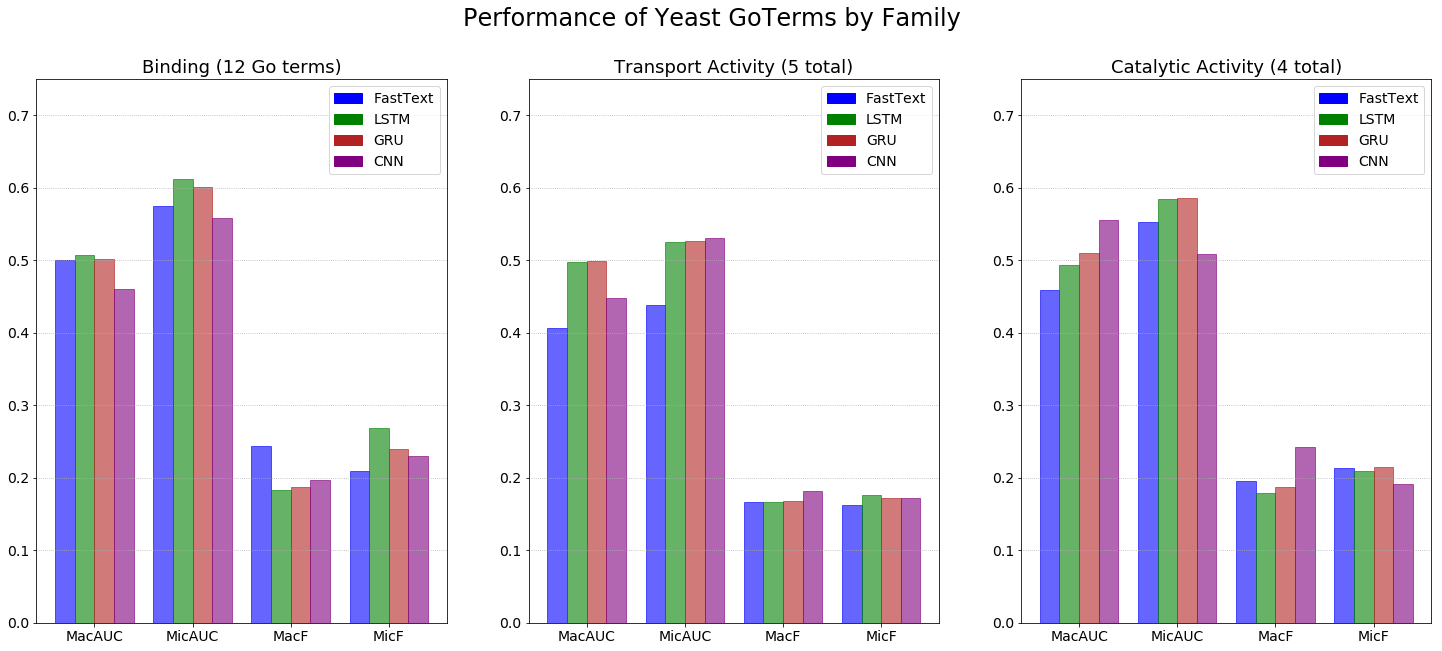

In [280]:
ax = plt.figure(figsize=[25,10])
plt.suptitle('Performance of Yeast GoTerms by Family', size=24)

plt.subplot(1,3,1)
basics(Yeast_DF_binding, metrics=['MacAUC', 'MicAUC', 'MacF', 'MicF'], models= 
       ['FastText', 'LSTM', 'GRU', 'CNN'])
plt.title('Binding (12 Go terms)', size=18)

plt.subplot(1,3,2)
basics(Yeast_DF_transport, metrics=['MacAUC', 'MicAUC', 'MacF', 'MicF'], models= 
       ['FastText', 'LSTM', 'GRU', 'CNN'])
plt.title('Transport Activity (5 total)', size=18)

plt.subplot(1,3,3)
basics(Yeast_DF_catalytic, metrics=['MacAUC', 'MicAUC', 'MacF', 'MicF'], models= 
       ['FastText', 'LSTM', 'GRU', 'CNN'])
plt.title('Catalytic Activity (4 total)', size=18)

plt.savefig('Performance_Yeast_by_Family.pdf')